In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-08-09  132.190002  132.470001  129.505005  130.149994  130.149994   
247 2023-08-10  131.970001  132.647003  130.035004  130.210007  130.210007   
248 2023-08-11  129.201996  130.440002  128.750000  130.169998  130.169998   
249 2023-08-14  129.850006  131.910004  129.589996  131.830002  131.830002   
250 2023-08-15  131.589996  131.990005  129.819000  130.270004  130.270004   

       Volume  
246  17745200  
247  17855700  
248  15191500  
249  17526200  
250  14751200  


In [ ]:
#We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:


In [3]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-08-16  122.510002
1 2022-08-17  120.320000
2 2022-08-18  120.860001
3 2022-08-19  118.120003
4 2022-08-22  115.070000


In [ ]:
#Now let’s visualize the close prices of Google before moving forward:


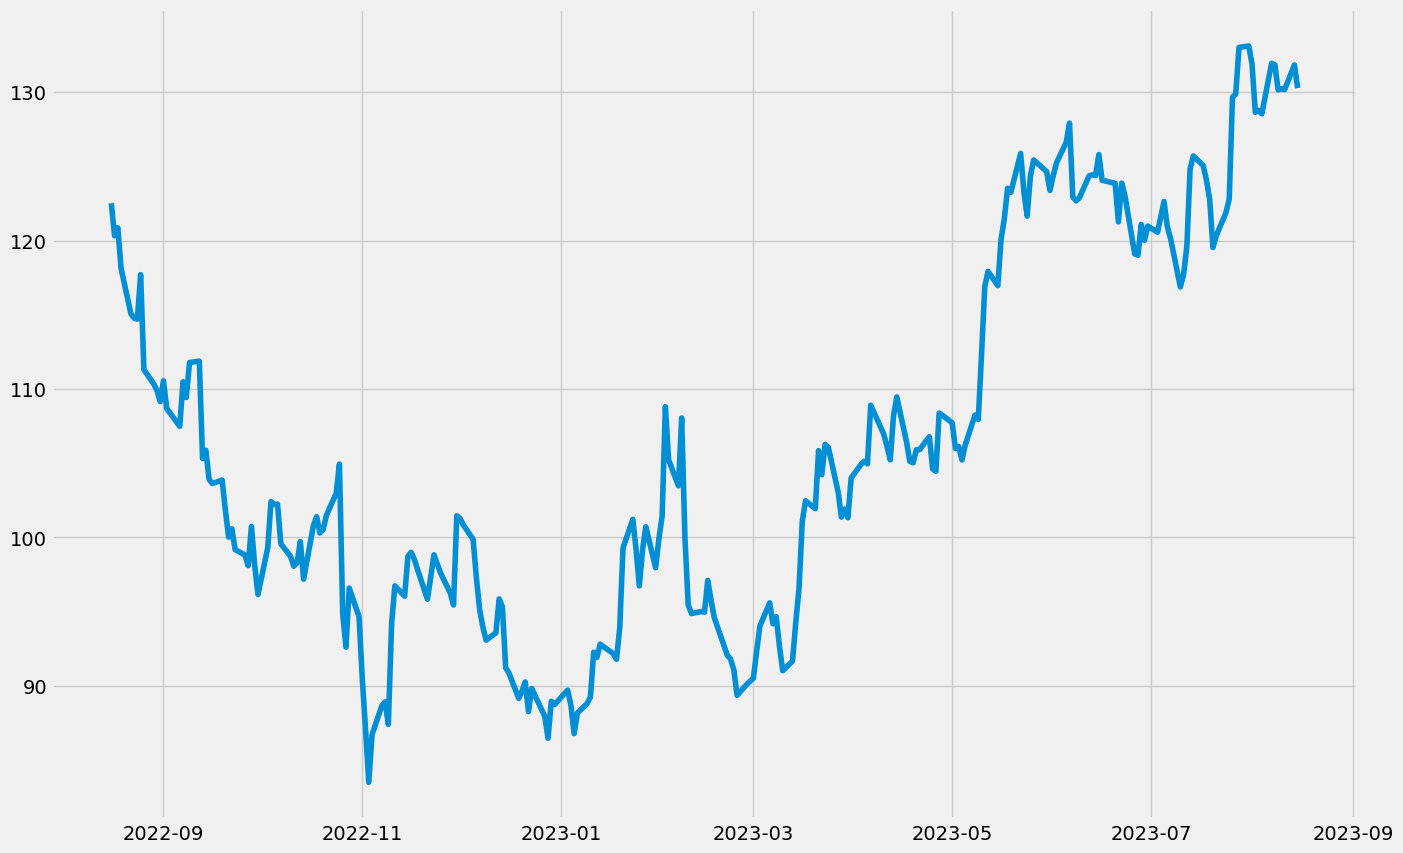

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

In [ ]:
#check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:
    

<Figure size 640x480 with 0 Axes>

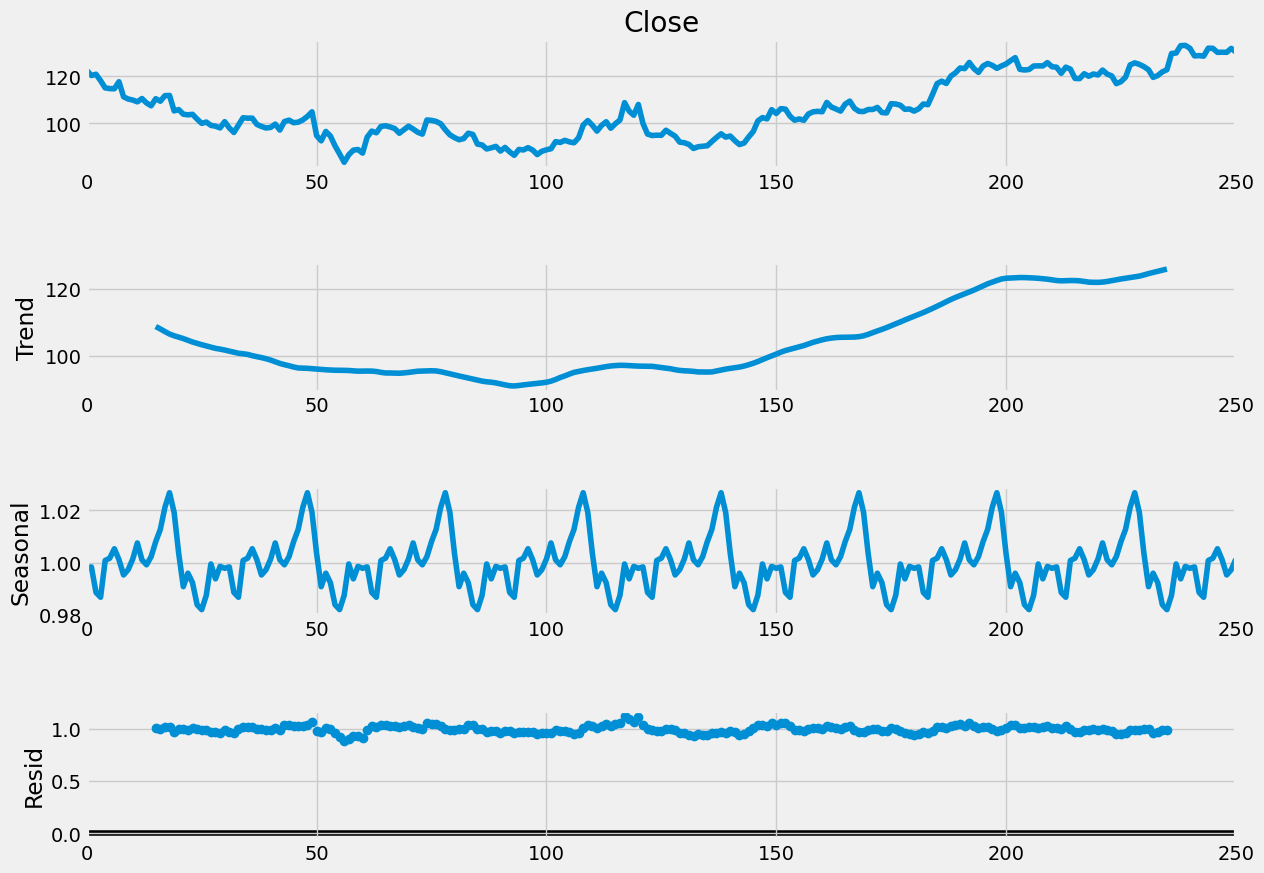

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative',period=30) 
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [ ]:
#Now here’s how to find the value of p:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

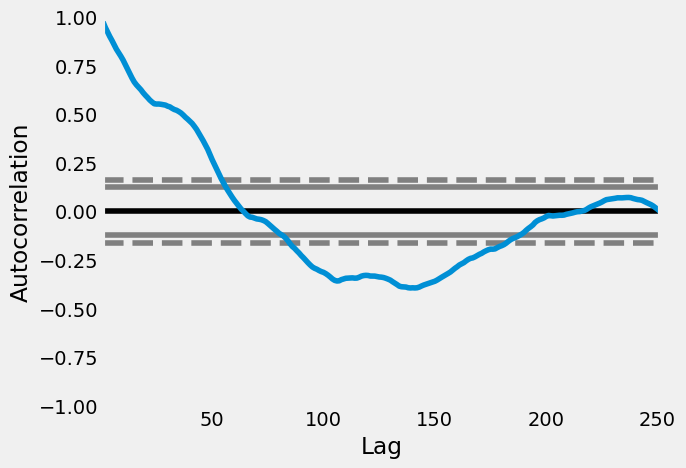

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

In [ ]:
#Now let’s find the value of q (moving average):

C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


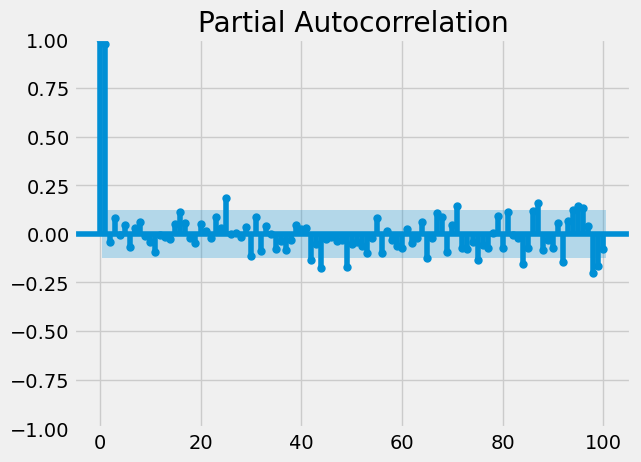

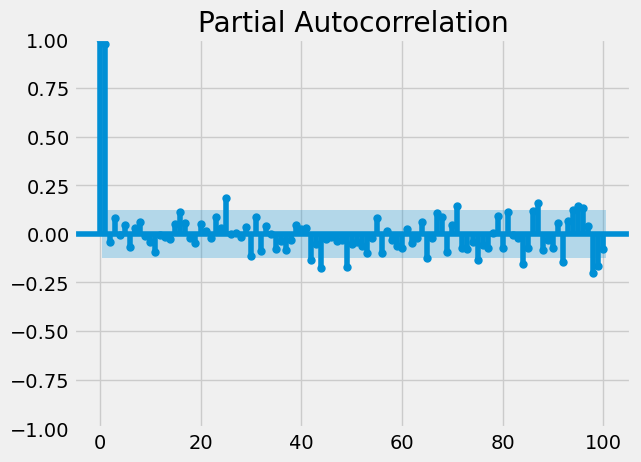

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
#Now let’s build an ARIMA model:

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()
print(fitted.summary())

C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -560.566
Date:                Wed, 16 Aug 2023   AIC                           1137.132
Time:                        20:27:18   BIC                           1165.304
Sample:                             0   HQIC                          1148.471
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1689      0.067      2.535      0.011       0.038       0.300
ar.L2         -1.0590      0.075    -14.082      0.000      -1.206      -0.912
ar.L3          0.0815      0.098      0.830      0.4

In [ ]:
#Here’s how to predict the values using the ARIMA MODEL

In [9]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      122.510027
2      120.237342
3      121.102903
4      117.892637
          ...    
246    131.418032
247    130.480917
248    130.491209
249    129.952190
250    131.743591
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
#So, here’s how to build a SARIMA model:

In [11]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\SANTHOSH JEEVA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -547.630
Date:                            Wed, 16 Aug 2023   AIC                           1125.259
Time:                                    20:33:36   BIC                           1177.343
Sample:                                         0   HQIC                          1146.250
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4926      0.148    -10.068      0.000      -1.783      -1.202
ar.L2         -0.8673      0.168   

In [ ]:
#Now let’s predict the future stock prices using the SARIMA model for the Next 10 days

In [12]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    128.285447
252    128.486328
253    128.560413
254    129.616345
255    129.687444
256    131.326241
257    133.490726
258    132.452558
259    132.469374
260    131.414189
261    132.277840
Name: predicted_mean, dtype: float64


In [ ]:
#Here’s how you can plot the predictions:


<AxesSubplot:>

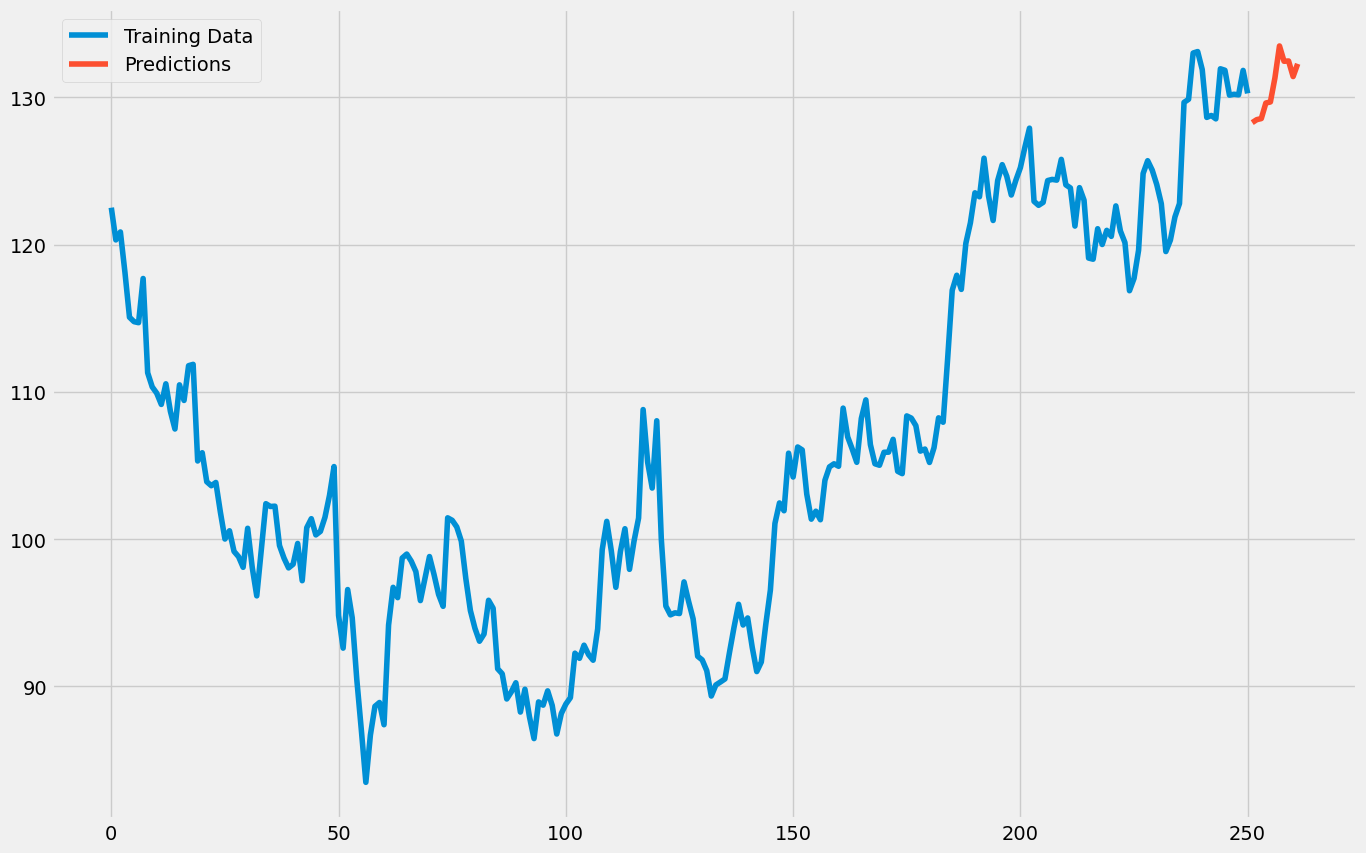

In [13]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")